In [1]:
import sys
import pandas as pd
import pickle
from amlpp.transformers import *
from amlpp.conveyor import *
from amlpp.architect import *

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analytic6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analytic6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df = pd.read_excel('tr_28k_s256_newubki_alltime_new_cf.xlsx')

In [11]:
from custom_transform.transforms import *
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import numpy as np

categorical_columns = ['organization_type_other', 'position_other', 'email', 'ceduc', 'family', 'sstate', 'cgrag', 'income_source_id',
                      'income_frequency_id', 'has_prior_employment', 'empoyees_count_id', 'organization_branch_id', 'organization_type_id', 'position_id',
                      'employment_type_id', 'has_movables', 'has_immovables', 'fact_addr_owner_type_id', 'fact_addr_region_id', 'fact_addr_same', 'addr_owner_type_id',
                      'addr_region_id', 'education_id', 'children_count_id', 'marital_status_id', 'gender_id', 
                      'country_det','city_det', 'region_det', 'isp', 'browser', 'system', 'brand'
                      ]

model = Conveyor (
                  TransformClassicExt(),
                  Word2Vectorization(columns=['purpose_other'], epochs = 100),
                  CategoricalEncoder(columns=categorical_columns),
                  ImputerIterative(),
                  estimator =  LGBMRegressor(
                                            cat_smooth=23, colsample_bytree=0.85, learning_rate=0.005,
                                            max_depth=10, min_child_samples=17, num_leaves=237,
                                            random_state=42, reg_alpha=0.0014249285905021153,
                                            reg_lambda=0.007253299932166387, subsample=0.7
                                             ) 
                  )

In [4]:
X_train,  X_test, Y_train, Y_test = train_test_split(df, df, test_size = 0.1, random_state=42)

In [12]:
model.fit_model(
    df, df,
    df, df,
    tpot_params = {"generations":1, "population_size":5, "n_jobs":-1},
    categorical_columns = categorical_columns,
    lgb_params = {'n_trials':50},
    rating_func='roc_auc_score')

100%|██████████| 4/4 [01:33<00:00, 23.30s/it, transform=ImputerIterative]


**************************************************************************************************** 
 start fit lgb model !!!!


In [5]:
model.fit(X_train, Y_train)

100%|██████████| 4/4 [00:01<00:00,  3.76it/s, transform=ImputerIterative]


In [6]:
x_, y_ = model.transform(X_train, Y_train)

In [10]:
pred = model.predict(X_train)

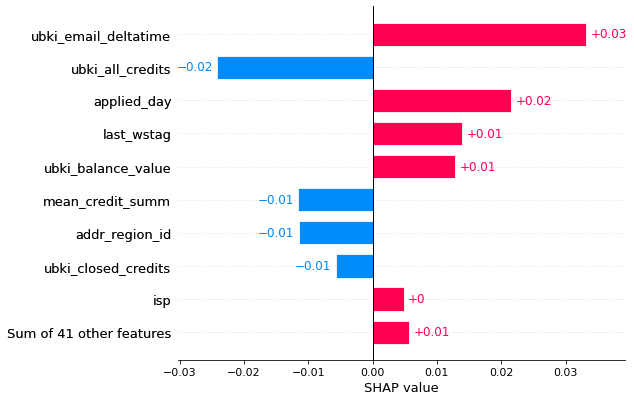

KeyboardInterrupt: 

In [12]:
model.feature_importances(df, df)